In [28]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [29]:
x = tf.ones(shape=(2, 1))
print(x)
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


In [30]:
x = tf.random.normal(shape=(3, 1), mean=0, stddev=1)
print(x)
x = tf.random.uniform(shape=(3, 1), minval=0, maxval=1)
print(x)

tf.Tensor(
[[ 0.39600125]
 [ 1.0485902 ]
 [-0.20972922]], shape=(3, 1), dtype=float32)
tf.Tensor(
[[0.30046058]
 [0.37749422]
 [0.20000768]], shape=(3, 1), dtype=float32)


In [31]:
import numpy as np
x = np.ones(shape=(2, 2))
print(x)
x[0, 0] = 0
print(x)

[[1. 1.]
 [1. 1.]]
[[0. 1.]
 [1. 1.]]


In [32]:
# x =tf.ones(shape=(2,2))
# print(x)
# x[0, 0] = 0

In [33]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 1.5047396 ],
       [ 1.8985524 ],
       [-0.45588976]], dtype=float32)>


In [34]:
# Assiging values to the tensor
v.assign(tf.ones((3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>


In [35]:
# 3.7 Assigin a value to a subset of a tensorflow variable
v[0, 0].assign(3,)
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>


In [36]:
v.assign_add(tf.ones((3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>


In [37]:
#3.5.2
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d
print(f'a:\n {a}')
print(f'b:\n {b}')
print(f'c:\n {c}')
print(f'd:\n {d}')
print(f'e:\n {e}')

a:
 [[1. 1.]
 [1. 1.]]
b:
 [[1. 1.]
 [1. 1.]]
c:
 [[1. 1.]
 [1. 1.]]
d:
 [[2. 2.]
 [2. 2.]]
e:
 [[4. 4.]
 [4. 4.]]


In [38]:
# 3.10
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
    result = tf.square(input_var)

gradient = tape.gradient(result, input_var)
print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


In [39]:
# 3.11 using GradientTape with constant tensor inputs
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
    tape.watch(input_const)
    result = tf.square(input_const)
gradient = tape.gradient(result, input_const)
print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


In [40]:
#3.12 using nested gradient tapes to compute second-order gradients
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position = 4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
    print(speed)
acceleration = outer_tape.gradient(speed, time)

print(acceleration)

tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(9.8, shape=(), dtype=float32)


In [41]:
# 3.13 generating two classes of random points in a 2D plane
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class)

positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class)

In [42]:
# 3.14 Stacking the 2 classes into an array of shape (2000, 2)
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [43]:
# 3.15 generating the corresponding targets (0 and 1)
targets = np.vstack((
    np.zeros((num_samples_per_class, 1), dtype='float32'),
    np.ones((num_samples_per_class, 1), dtype='float32')
))

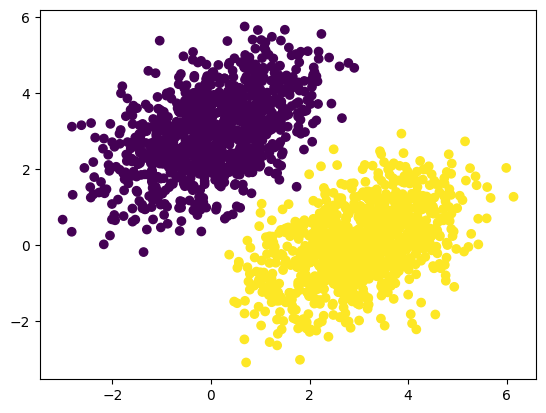

In [44]:
# 3.16 plotting the two point classes
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [45]:
# 3.17 creating the linear classifier variables affine prediction = W . input + b
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim, )))

In [46]:
# 3.18 hte forward pass function
def model(inputs):
    return tf.matmul(inputs, W) + b

# Note that the model prediction is W_1 * x + W_2*y + b

In [47]:
# 3.19 the mean squared error loss function
def square_loss(targets, predicitons):
    per_sample_losses = tf.square(targets - predicitons)
    return tf.reduce_mean(per_sample_losses)

In [48]:
# 3.20 the training step function
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        # forward pass in a gradient scope
        predcitions = model(inputs)
        loss = square_loss(targets, predcitions)
    grad_loss_wrt_W , grad_loss_wrt_b = tape.gradient(loss, [W, b]) # retrieve the gradietn wrt W and b
    # Update the weights
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [49]:

# 3.21 the batch training loop
for step in range(60):
    loss = training_step(inputs, targets)
    print(f'Loss at step {step}: {loss:.4f}')

Loss at step 0: 2.3986
Loss at step 1: 0.2827
Loss at step 2: 0.1367
Loss at step 3: 0.1124
Loss at step 4: 0.1032
Loss at step 5: 0.0963
Loss at step 6: 0.0902
Loss at step 7: 0.0847
Loss at step 8: 0.0796
Loss at step 9: 0.0750
Loss at step 10: 0.0708
Loss at step 11: 0.0670
Loss at step 12: 0.0635
Loss at step 13: 0.0603
Loss at step 14: 0.0574
Loss at step 15: 0.0547
Loss at step 16: 0.0523
Loss at step 17: 0.0500
Loss at step 18: 0.0480
Loss at step 19: 0.0461
Loss at step 20: 0.0444
Loss at step 21: 0.0429
Loss at step 22: 0.0415
Loss at step 23: 0.0402
Loss at step 24: 0.0390
Loss at step 25: 0.0379
Loss at step 26: 0.0370
Loss at step 27: 0.0361
Loss at step 28: 0.0352
Loss at step 29: 0.0345
Loss at step 30: 0.0338
Loss at step 31: 0.0332
Loss at step 32: 0.0326
Loss at step 33: 0.0321
Loss at step 34: 0.0316
Loss at step 35: 0.0312
Loss at step 36: 0.0308
Loss at step 37: 0.0304
Loss at step 38: 0.0301
Loss at step 39: 0.0298
Loss at step 40: 0.0295
Loss at step 41: 0.0293
Lo

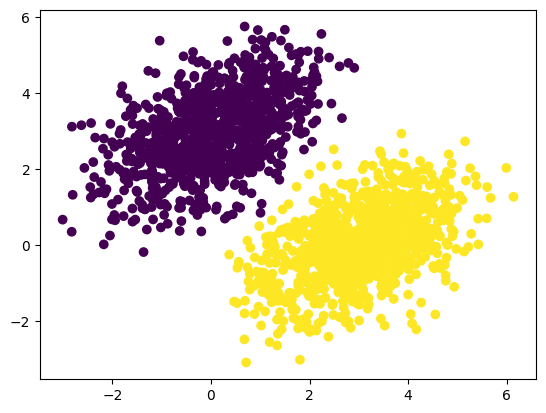

In [50]:
predictions = model(inputs)
# Classified as 1 if above 0.5 and 0 if below
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

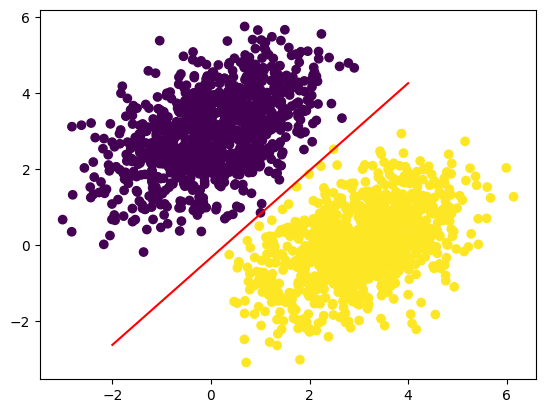

In [51]:
# Plot with the line equal to 0.5
x = np.linspace(-2, 4, 100) # generate 100 regualrly spaced numbers we will use to plot the line
y = - W[0] / W[1] * x + (0.5 - b) / W[1] # the equation of our line - rearranged w1 * x + w2 * y + b = 0.5
plt.plot(x, y, '-r')
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

In [52]:
# 3.22 A dense layer implemented as a Layer subclass
from tensorflow import keras


class SimpleDense(keras.layers.Layer):  # Inherit from the base Layer class

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):  # weight creation takes place in the build method
        input_dim = input_shape[-1]
        # add_weuight is shortcut method for creating weights. I.e instead of tf.Variable(...)
        self.W = self.add_weight(
            shape=(input_dim, self.units), initializer='random_normal')
        # add_weuight is shortcut method for creating weights. I.e instead of tf.Variable(...)
        self.b = self.add_weight(shape=(self.units, ), initializer='zeros')

    def call(self, inputs):  # define the forward pass computation in the call method
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [53]:
# intiating the layer
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


In [54]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['accuracy'])